# Implementing linear regression to predict Individual medical costs billed by health insurance using both (Scikit-learn and Python form scratch implementation)

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

C:\Users\Marina\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load The Dataset

In [2]:
df = pd.read_csv(r"D:\4th year\ML for Bio Robotics\Tasks\ML_for_Bio_Robotics-\Task1\insurance.csv")

Explore The Dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Convert Categorical Columns to Numerical 

## 1. Missing values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values 

## 2. Inconsistent Values

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'age': [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Unique values in 'sex': ['female' 'male']
Unique values in 'bmi': [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1

#### There are no Inconsistent Values

## 3. Categorical Variables/Non- Numerical Data

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1}) #convert female to 0 and male to 1 

In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['smoker']=df['smoker'].map({'no': 0, 'yes': 1}) #convert non smoker to 0 and smoker to 1 

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
# Perform one-hot encoding for the 'region' column
df = pd.get_dummies(df, columns=['region'], prefix=['region'])
df = df.astype(int)

In [13]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0


# Data Splitting

Extract features (independent variables) and target variable (medical costs)

In [14]:
X = df.drop(columns=['charges']) # all columns except charges are the input variables
y = df['charges'] # target Variable

# Linear Regression Using Sickit-Learn

Split the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training

In [16]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

### Testing

In [17]:
y_pred = model.predict(X_test)

### Evaluation 

In [18]:
# Evaluate the model on the training set
train_acc = model.score(X=X_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100:.2f}%")

# Evaluate the model on the test set
test_acc = model.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the training dataset is: 74.16%
The model's accuracy on the testing dataset is: 78.38%


In [19]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficients: 
 [ 2.57096202e+02 -1.72621748e+01  3.35633616e+02  4.27589784e+02
  2.36556741e+04  4.62867198e+02  9.86618374e+01 -2.04777180e+02
 -3.56751855e+02]
Mean squared error: 33566439.74
Coefficient of determination: 0.78


# Linear Regression Implementation from Scratch:

In [20]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#I have implemented this in an old course
class LinearRegression() : 
      
    def __init__( self, learning_rate, iterations ) : 
          
        self.learning_rate = learning_rate 
          
        self.iterations = iterations 
          
  
              
    def fit( self, X, Y ) : 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X.shape 
          
        # weight initialization 
          
        self.W = np.zeros( self.n ) 
          
        self.b = 0
          
        self.X = X 
          
        self.Y = Y 
          
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) : 
              
            self.update_weights() 
              
        return self
      
    # function to update weights in gradient descent 
      
    def update_weights( self ) : 
             
        Y_pred = self.predict( self.X ) 
          
        # calculate gradients   
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m 
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        # update weights 
      
        self.W = self.W - self.learning_rate * dW 
      
        self.b = self.b - self.learning_rate * db 
          
        return self
      
   
      
    def predict( self, X ) : 
      
        return X.dot( self.W ) + self.b 
     

### Normalization

In [22]:
# Assuming X_train and X_test are your feature matrices
mean = np.mean(X_train_2, axis=0)
std = np.std(X_train_2, axis=0)

X_train_scaled = (X_train_2 - mean) / std
X_test_scaled = (X_test_2 - mean) / std


### Training 

In [23]:
model = LinearRegression(0.1,200)

# Train the model
model.fit(X_train_scaled.to_numpy(),y_train.to_numpy())

# Predict using the test set
y_pred_2 = model.predict(X_test_scaled)


### Testing

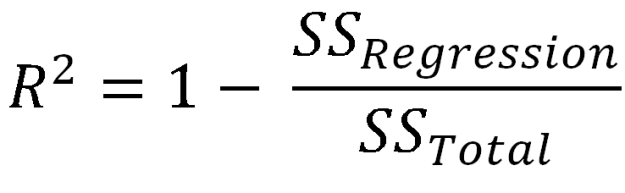

In [24]:
# Calculate R^2 score (coefficient of determination) as a measure of model performance
mean_y = np.mean(y_test)
ss_total = np.sum((y_test - mean_y) ** 2)
ss_residual = np.sum((y_test - y_pred_2) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Print R^2 score
print('R^2 Score: ', r_squared)

R^2 Score:  0.7837888448800691
